In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# daatset api
!kaggle competitions download -c cifar-10

100% 715M/715M [00:40<00:00, 22.2MB/s]
100% 715M/715M [00:40<00:00, 18.4MB/s]


In [4]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [5]:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [7]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 101.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 13.8 MB/s eta 0:00:00


In [9]:
import py7zr

archieve = py7zr.SevenZipFile('/content/train.7z', mode='r')
archieve.extractall()
archieve.close()

In [10]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [11]:
# importing the Dependencies
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [12]:
filenames = os.listdir('/content/train')

In [13]:
type(filenames)

list

In [14]:
len(filenames)

50000

In [17]:
print(filenames[0:5])
print(filenames[-5:])

['21781.png', '17522.png', '25457.png', '11290.png', '24885.png']
['6163.png', '29298.png', '26641.png', '17471.png', '2254.png']


In [18]:
# Labels Processing
labels_df = pd.read_csv('/content/trainLabels.csv')

In [19]:
labels_df.shape

(50000, 2)

In [20]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [21]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [22]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels =[labels_dictionary[i] for i in labels_df['label']]


In [23]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


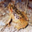

In [24]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

In [25]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [26]:
id_list = list(labels_df['id'])

In [27]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [28]:
# Image Processing
# Converting images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [29]:
type(data)

list

In [30]:
len(data)

50000

In [31]:
type(data[0])

numpy.ndarray

In [32]:
data[0].shape

(32, 32, 3)

In [33]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [34]:
# convert image list and label to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [35]:
type(X)

numpy.ndarray

In [37]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [41]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled

In [44]:
import tensorflow as tf
from tensorflow import keras

In [45]:
num_of_classes = 10

#setting up the layers of Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32, 3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [47]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [49]:
# training the neural network
model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 11s 5ms/step - loss: 1.9280 - acc: 0.2960 - val_loss: 1.8201 - val_acc: 0.3365
Epoch 2/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7715 - acc: 0.3626 - val_loss: 1.7102 - val_acc: 0.3885
Epoch 3/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.7103 - acc: 0.3881 - val_loss: 1.6743 - val_acc: 0.3975
Epoch 4/10
1125/1125 [==============================] - 5s 5ms/step - loss: 1.6744 - acc: 0.4026 - val_loss: 1.6896 - val_acc: 0.3913
Epoch 5/10
1125/1125 [==============================] - 5s 5ms/step - loss: 1.6392 - acc: 0.4150 - val_loss: 1.6281 - val_acc: 0.4207
Epoch 6/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.6159 - acc: 0.4212 - val_loss: 1.6211 - val_acc: 0.4130
Epoch 7/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.5887 - acc: 0.4314 - val_loss: 1.5933 - val_acc: 0.4275
Epoch 8/10
1125/1125 [==============================] - 5s 4m

In [50]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
convolutional_base.summary()

In [60]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [61]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [62]:
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 481s 395ms/step - loss: 2.0938 - acc: 0.2459 - val_loss: 3.8486 - val_acc: 0.1375
Epoch 2/10
1125/1125 [==============================] - 441s 392ms/step - loss: 1.4765 - acc: 0.4686 - val_loss: 2.4413 - val_acc: 0.3268
Epoch 3/10
1125/1125 [==============================] - 441s 392ms/step - loss: 1.2421 - acc: 0.5659 - val_loss: 1.1276 - val_acc: 0.5932
Epoch 4/10
1125/1125 [==============================] - 435s 386ms/step - loss: 1.0940 - acc: 0.6262 - val_loss: 1.1354 - val_acc: 0.6108
Epoch 5/10
1125/1125 [==============================] - 434s 386ms/step - loss: 0.9973 - acc: 0.6624 - val_loss: 0.9837 - val_acc: 0.6585
Epoch 6/10
1125/1125 [==============================] - 434s 386ms/step - loss: 0.9090 - acc: 0.6960 - val_loss: 0.9025 - val_acc: 0.6860
Epoch 7/10
1125/1125 [==============================] - 441s 392ms/step - loss: 0.8247 - acc: 0.7245 - val_loss: 0.8388 - val_acc: 0.7230
Epoch 8/10
1125/1125 [============

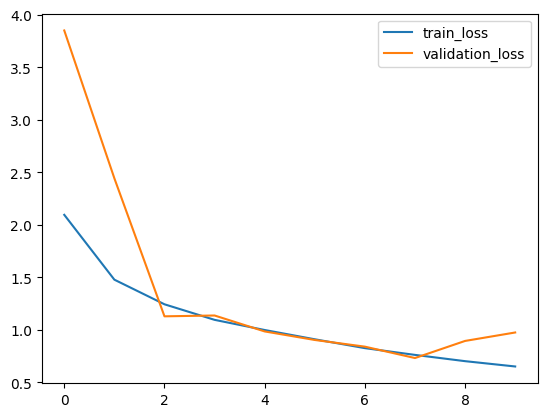

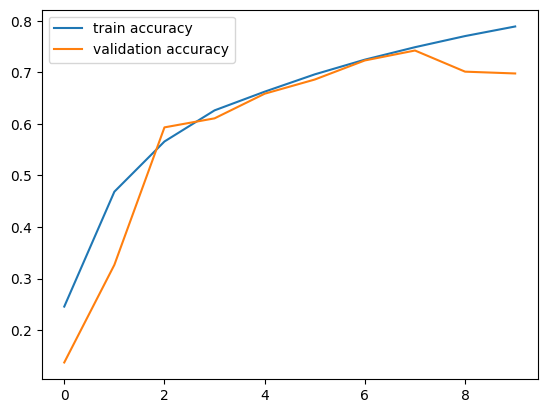

In [63]:
h = history

plt.plot(h.history['loss'], label='train_loss')
plt.plot(h.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()